In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# Set display options to show all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Create a path to where the data is stored.
path = 'C:/Users/kaan/ML_2'

In [4]:
X = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_cleaned.csv'))

In [5]:
y = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'predictions_cleaned.csv'))

In [6]:
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,STOCKHOLM_humidity,MUNCHENB_pressure
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,0.98,1.0304
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,0.62,1.0292
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

In [7]:
X.shape

(22950, 135)

In [10]:
# Sorting columns alphabetically

In [8]:
X = X[sorted(X.columns)]

In [9]:
X.head()

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,BELGRADE_global_radiation,BELGRADE_humidity,BELGRADE_precipitation,BELGRADE_pressure,BELGRADE_sunshine,BELGRADE_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BUDAPEST_cloud_cover,BUDAPEST_global_radiation,BUDAPEST_humidity,BUDAPEST_precipitation,BUDAPEST_pressure,BUDAPEST_sunshine,BUDAPEST_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,DEBILT_cloud_cover,DEBILT_global_radiation,DEBILT_humidity,DEBILT_precipitation,DEBILT_pressure,DEBILT_sunshine,DEBILT_temp_max,DEBILT_temp_mean,DEBILT_temp_min,DUSSELDORF_cloud_cover,DUSSELDORF_global_radiation,DUSSELDORF_humidity,DUSSELDORF_precipitation,DUSSELDORF_pressure,DUSSELDORF_sunshine,DUSSELDORF_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,HEATHROW_cloud_cover,HEATHROW_global_radiation,HEATHROW_humidity,HEATHROW_precipitation,HEATHROW_pressure,HEATHROW_sunshine,HEATHROW_temp_max,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,KASSEL_global_radiation,KASSEL_humidity,KASSEL_precipitation,KASSEL_pressure,KASSEL_sunshine,KASSEL_temp_max,KASSEL_temp_mean,KASSEL_temp_min,LJUBLJANA_cloud_cover,LJUBLJANA_global_radiation,LJUBLJANA_humidity,LJUBLJANA_precipitation,LJUBLJANA_pressure,LJUBLJANA_sunshine,LJUBLJANA_temp_max,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,MAASTRICHT_cloud_cover,MAASTRICHT_global_radiation,MAASTRICHT_humidity,MAASTRICHT_precipitation,MAASTRICHT_pressure,MAASTRICHT_sunshine,MAASTRICHT_temp_max,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min,MUNCHENB_cloud_cover,MUNCHENB_global_radiation,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_pressure,MUNCHENB_sunshine,MUNCHENB_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_min,OSLO_cloud_cover,OSLO_global_radiation,OSLO_humidity,OSLO_precipitation,OSLO_pressure,OSLO_sunshine,OSLO_temp_max,OSLO_temp_mean,OSLO_temp_min,SONNBLICK_cloud_cover,SONNBLICK_global_radiation,SONNBLICK_humidity,SONNBLICK_precipitation,SONNBLICK_pressure,SONNBLICK_sunshine,SONNBLICK_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,STOCKHOLM_cloud_cover,STOCKHOLM_global_radiation,STOCKHOLM_humidity,STOCKHOLM_precipitation,STOCKHOLM_pressure,STOCKHOLM_sunshine,STOCKHOLM_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
0,7,0.32,0.85,0.09,1.018,0.7,10.9,6.5,0.8,1,0.88,0.81,0.00,1.0195,7.0,7.9,3.7,-0.9,4,0.44,0.67,0.01,1.017,2.3,5.1,2.4,-0.4,7,0.07,0.85,0.25,1.0032,0.0,11.0,9.3,7.4,8,0.12,0.83,0.08,1.0161,0.0,11.5,10.0,7.0,7,0.13,0.91,0.22,1.0010,0.0,8.3,10.6,9.4,8,0.28,0.82,0.48,1.0094,1.6,9.4,7.9,3.9,8,0.20,1.00,0.00,1.0173,0.0,0.5,-0.6,-1.9,7,0.22,0.83,0.32,1.0063,1.0,11.1,9.5,8.5,6,0.53,0.92,0.0,1.0260,1.4,10.8,7.6,4.4,5,0.20,0.67,0.10,1.0304,0.0,10.4,6.9,1.1,8,0.04,0.98,1.14,0.9978,0.0,5.9,4.9,3.8,4,0.48,0.73,0.01,1.0304,2.3,-3.2,-5.9,-8.5,5,0.05,0.98,0.32,1.0114,0.0,4.9,4.2,2.2,5,0.45,0.88,0.34,1.0003,4.7,10.9,8.5,6.0
1,6,0.36,0.84,1.05,1.018,1.1,10.1,6.1,3.3,6,0.25,0.84,0.00,1.0172,0.0,4.4,2.9,2.2,4,0.18,0.67,0.31,1.017,0.0,3.1,2.3,1.4,8,0.14,0.90,0.06,1.0056,0.1,8.3,7.7,6.4,8,0.18,0.89,0.66,1.0161,0.5,11.0,8.2,7.4,7,0.13,0.98,0.23,1.0051,0.0,10.6,6.1,3.9,6,0.12,0.86,0.27,1.0086,0.0,9.1,7.7,6.8,6,0.56,0.94,0.13,1.0173,3.2,5.5,2.1,-1.3,8,0.17,0.92,1.34,1.0062,0.4,9.9,8.6,7.5,7,0.46,0.86,0.0,1.0254,0.9,12.2,9.8,7.4,6,0.61,0.72,0.30,1.0292,5.1,10.2,6.2,4.2,8,0.04,0.62,0.00,1.0139,0.0,4.9,3.4,2.8,6,0.21,0.97,0.61,1.0292,0.0,-8.5,-9.5,-10.5,5,0.05,0.62,0.06,1.0114,0.0,5.0,4.0,3.0,7,0.25,0.91,0.84,1.0007,0.7,12.1,8.9,5.6
2,8,0.18,0.90,0.30,1.018,0.0,9.9,8.5,5.1,6,0.67,0.77,0.00,1.0179,3.5,6.4,3.1,-0.5,4,0.30,0.67,0.00,1.017,0.6,5.3,2.7,1.7,6,0.28,0.92,0.01,1.016

In [11]:
y.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
y.shape

(22950, 15)

In [16]:
# adding date column in order to isolate a decade 
# starting with importing original datasets
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'raw.csv'))

In [17]:
df_pw = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [25]:
# selecting 'DATE' column to add the cleaned datasets
X['DATE'] = df['DATE'].values

In [24]:
X.head()

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,BELGRADE_global_radiation,BELGRADE_humidity,BELGRADE_precipitation,BELGRADE_pressure,BELGRADE_sunshine,BELGRADE_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BUDAPEST_cloud_cover,BUDAPEST_global_radiation,BUDAPEST_humidity,BUDAPEST_precipitation,BUDAPEST_pressure,BUDAPEST_sunshine,BUDAPEST_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,DEBILT_cloud_cover,DEBILT_global_radiation,DEBILT_humidity,DEBILT_precipitation,DEBILT_pressure,DEBILT_sunshine,DEBILT_temp_max,DEBILT_temp_mean,DEBILT_temp_min,DUSSELDORF_cloud_cover,DUSSELDORF_global_radiation,DUSSELDORF_humidity,DUSSELDORF_precipitation,DUSSELDORF_pressure,DUSSELDORF_sunshine,DUSSELDORF_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,HEATHROW_cloud_cover,HEATHROW_global_radiation,HEATHROW_humidity,HEATHROW_precipitation,HEATHROW_pressure,HEATHROW_sunshine,HEATHROW_temp_max,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,KASSEL_global_radiation,KASSEL_humidity,KASSEL_precipitation,KASSEL_pressure,KASSEL_sunshine,KASSEL_temp_max,KASSEL_temp_mean,KASSEL_temp_min,LJUBLJANA_cloud_cover,LJUBLJANA_global_radiation,LJUBLJANA_humidity,LJUBLJANA_precipitation,LJUBLJANA_pressure,LJUBLJANA_sunshine,LJUBLJANA_temp_max,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,MAASTRICHT_cloud_cover,MAASTRICHT_global_radiation,MAASTRICHT_humidity,MAASTRICHT_precipitation,MAASTRICHT_pressure,MAASTRICHT_sunshine,MAASTRICHT_temp_max,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min,MUNCHENB_cloud_cover,MUNCHENB_global_radiation,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_pressure,MUNCHENB_sunshine,MUNCHENB_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_min,OSLO_cloud_cover,OSLO_global_radiation,OSLO_humidity,OSLO_precipitation,OSLO_pressure,OSLO_sunshine,OSLO_temp_max,OSLO_temp_mean,OSLO_temp_min,SONNBLICK_cloud_cover,SONNBLICK_global_radiation,SONNBLICK_humidity,SONNBLICK_precipitation,SONNBLICK_pressure,SONNBLICK_sunshine,SONNBLICK_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,STOCKHOLM_cloud_cover,STOCKHOLM_global_radiation,STOCKHOLM_humidity,STOCKHOLM_precipitation,STOCKHOLM_pressure,STOCKHOLM_sunshine,STOCKHOLM_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,DATE
0,7,0.32,0.85,0.09,1.018,0.7,10.9,6.5,0.8,1,0.88,0.81,0.00,1.0195,7.0,7.9,3.7,-0.9,4,0.44,0.67,0.01,1.017,2.3,5.1,2.4,-0.4,7,0.07,0.85,0.25,1.0032,0.0,11.0,9.3,7.4,8,0.12,0.83,0.08,1.0161,0.0,11.5,10.0,7.0,7,0.13,0.91,0.22,1.0010,0.0,8.3,10.6,9.4,8,0.28,0.82,0.48,1.0094,1.6,9.4,7.9,3.9,8,0.20,1.00,0.00,1.0173,0.0,0.5,-0.6,-1.9,7,0.22,0.83,0.32,1.0063,1.0,11.1,9.5,8.5,6,0.53,0.92,0.0,1.0260,1.4,10.8,7.6,4.4,5,0.20,0.67,0.10,1.0304,0.0,10.4,6.9,1.1,8,0.04,0.98,1.14,0.9978,0.0,5.9,4.9,3.8,4,0.48,0.73,0.01,1.0304,2.3,-3.2,-5.9,-8.5,5,0.05,0.98,0.32,1.0114,0.0,4.9,4.2,2.2,5,0.45,0.88,0.34,1.0003,4.7,10.9,8.5,6.0,19600101
1,6,0.36,0.84,1.05,1.018,1.1,10.1,6.1,3.3,6,0.25,0.84,0.00,1.0172,0.0,4.4,2.9,2.2,4,0.18,0.67,0.31,1.017,0.0,3.1,2.3,1.4,8,0.14,0.90,0.06,1.0056,0.1,8.3,7.7,6.4,8,0.18,0.89,0.66,1.0161,0.5,11.0,8.2,7.4,7,0.13,0.98,0.23,1.0051,0.0,10.6,6.1,3.9,6,0.12,0.86,0.27,1.0086,0.0,9.1,7.7,6.8,6,0.56,0.94,0.13,1.0173,3.2,5.5,2.1,-1.3,8,0.17,0.92,1.34,1.0062,0.4,9.9,8.6,7.5,7,0.46,0.86,0.0,1.0254,0.9,12.2,9.8,7.4,6,0.61,0.72,0.30,1.0292,5.1,10.2,6.2,4.2,8,0.04,0.62,0.00,1.0139,0.0,4.9,3.4,2.8,6,0.21,0.97,0.61,1.0292,0.0,-8.5,-9.5,-10.5,5,0.05,0.62,0.06,1.0114,0.0,5.0,4.0,3.0,7,0.25,0.91,0.84,1.0007,0.7,12.1,8.9,5.6,19600102
2,8,0.18,0.90,0.30,1.018,0.0,9.9,8.5,5.1,6,0.67,0.77,0.00,1.0179,3.5,6.4,3.1,-0.5,4,0.30,0.67,0.00,1.017,0.6,5.3,2.7,1.7

In [26]:
y['DATE'] = df_pw['DATE'].values

In [27]:
y.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,DATE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600101
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600102
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600103
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600104
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19600105


In [28]:
# Select a decade for the model (2000-2009)
X_decade = X[
    (X['DATE'].astype(str).str[:4] >= '2000') &
    (X['DATE'].astype(str).str[:4] <= '2009')
]

In [31]:
X_decade.head()

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,BELGRADE_global_radiation,BELGRADE_humidity,BELGRADE_precipitation,BELGRADE_pressure,BELGRADE_sunshine,BELGRADE_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BUDAPEST_cloud_cover,BUDAPEST_global_radiation,BUDAPEST_humidity,BUDAPEST_precipitation,BUDAPEST_pressure,BUDAPEST_sunshine,BUDAPEST_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,DEBILT_cloud_cover,DEBILT_global_radiation,DEBILT_humidity,DEBILT_precipitation,DEBILT_pressure,DEBILT_sunshine,DEBILT_temp_max,DEBILT_temp_mean,DEBILT_temp_min,DUSSELDORF_cloud_cover,DUSSELDORF_global_radiation,DUSSELDORF_humidity,DUSSELDORF_precipitation,DUSSELDORF_pressure,DUSSELDORF_sunshine,DUSSELDORF_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,HEATHROW_cloud_cover,HEATHROW_global_radiation,HEATHROW_humidity,HEATHROW_precipitation,HEATHROW_pressure,HEATHROW_sunshine,HEATHROW_temp_max,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,KASSEL_global_radiation,KASSEL_humidity,KASSEL_precipitation,KASSEL_pressure,KASSEL_sunshine,KASSEL_temp_max,KASSEL_temp_mean,KASSEL_temp_min,LJUBLJANA_cloud_cover,LJUBLJANA_global_radiation,LJUBLJANA_humidity,LJUBLJANA_precipitation,LJUBLJANA_pressure,LJUBLJANA_sunshine,LJUBLJANA_temp_max,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,MAASTRICHT_cloud_cover,MAASTRICHT_global_radiation,MAASTRICHT_humidity,MAASTRICHT_precipitation,MAASTRICHT_pressure,MAASTRICHT_sunshine,MAASTRICHT_temp_max,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min,MUNCHENB_cloud_cover,MUNCHENB_global_radiation,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_pressure,MUNCHENB_sunshine,MUNCHENB_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_min,OSLO_cloud_cover,OSLO_global_radiation,OSLO_humidity,OSLO_precipitation,OSLO_pressure,OSLO_sunshine,OSLO_temp_max,OSLO_temp_mean,OSLO_temp_min,SONNBLICK_cloud_cover,SONNBLICK_global_radiation,SONNBLICK_humidity,SONNBLICK_precipitation,SONNBLICK_pressure,SONNBLICK_sunshine,SONNBLICK_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,STOCKHOLM_cloud_cover,STOCKHOLM_global_radiation,STOCKHOLM_humidity,STOCKHOLM_precipitation,STOCKHOLM_pressure,STOCKHOLM_sunshine,STOCKHOLM_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,DATE
14610,8,0.20,0.89,0.03,1.0286,0.0,3.9,2.9,1.6,7,0.24,0.88,0.0,1.0275,0.0,-0.4,-2.5,-3.2,3,0.52,0.92,0.0,1.0268,3.7,-0.7,-4.9,-8.4,7,0.14,0.97,0.10,1.0240,0.0,8.1,6.1,3.5,8,0.12,0.92,0.22,1.0240,0.0,6.9,4.2,2.5,7,0.18,0.94,0.00,1.0245,0.4,10.8,7.0,4.9,6,0.12,0.93,0.13,1.0237,0.0,5.0,3.5,1.5,6,0.57,0.83,0.0,1.0294,5.2,-1.3,-4.8,-9.1,8,0.12,0.98,0.17,1.0251,0.0,6.9,5.6,4.1,1,1.02,0.80,0.0,1.0282,8.4,10.4,5.4,0.3,8,0.20,0.91,0.20,1.0420,0.0,2.6,1.7,-0.5,7,-0.03,0.94,0.60,1.0130,0.0,-3.2,-5.0,-8.6,7,0.82,0.89,1.34,1.0420,0.0,-13.4,-15.2,-17.0,8,0.05,0.94,0.17,1.0163,0.0,0.7,-2.3,-9.3,6,0.22,0.89,0.10,1.0235,0.7,11.0,6.6,2.1,20000101
14611,8,0.25,0.87,0.00,1.0318,0.0,4.8,3.6,2.7,8,0.25,0.85,0.0,1.0303,0.0,-0.3,-1.2,-2.6,8,0.14,0.94,0.0,1.0297,0.4,-1.9,-3.6,-5.0,8,0.08,0.97,0.00,1.0267,0.0,8.7,7.3,5.4,6,0.19,0.87,0.00,1.0283,0.7,7.9,6.5,2.7,7,0.20,0.89,0.02,1.0253,0.7,11.5,7.9,5.0,6,0.33,0.92,0.00,1.0290,2.9,4.7,2.3,0.3,6,0.59,0.76,0.0,1.0310,5.0,2.0,-0.9,-4.9,7,0.14,0.95,0.00,1.0286,0.0,7.5,6.2,4.2,0,1.03,0.78,0.0,1.0279,8.5,9.6,5.0,0.3,6,0.66,0.90,0.00,1.0467,6.1,5.8,1.9,-0.2,6,-0.03,0.94,0.00,1.0076,1.6,2.4,-0.8,-6.7,5,0.60,0.86,0.39,1.0467,2.8,-12.3,-13.7,-15.0,8,0.05,0.94,0.20,1.0108,0.0,2.0,1.3,0.5,8,0.13,0.92,0.42,1.0177,0.0,10.6,9.6,7.3,20000102
14612,5,0.50,0.81,0.00,1.0314,3.7,4.8,2.2,0.1,5,0.50,0.84,0.0,1.0310,1.4,1.4,-1.0,-3.4,6,0.19,0.

In [32]:
X_decade.shape

(3653, 136)

In [33]:
# selecting decade for prediction dataset
y_decade = y[
    (y['DATE'].astype(str).str[:4] >= '2000') &
    (y['DATE'].astype(str).str[:4] <= '2009')
]

In [34]:
y_decade.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,DATE
14610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000101
14611,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000102
14612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000103
14613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000104
14614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20000105


In [36]:
y_decade.shape

(3653, 16)

In [37]:
# Drop 'DATE' columns from datasets for the model 
X_decade.drop(['DATE'], axis=1, inplace=True)
y_decade.drop(['DATE'], axis=1, inplace=True)

C:\Users\kaan\AppData\Local\Temp\ipykernel_11464\2544145747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_decade.drop(['DATE'], axis=1, inplace=True)
C:\Users\kaan\AppData\Local\Temp\ipykernel_11464\2544145747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_decade.drop(['DATE'], axis=1, inplace=True)


In [38]:
X_decade.shape

(3653, 135)

In [39]:
y_decade.shape

(3653, 15)

In [40]:
X_decade.head()

,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_sunshine,BASEL_temp_max,BASEL_temp_mean,BASEL_temp_min,BELGRADE_cloud_cover,BELGRADE_global_radiation,BELGRADE_humidity,BELGRADE_precipitation,BELGRADE_pressure,BELGRADE_sunshine,BELGRADE_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BUDAPEST_cloud_cover,BUDAPEST_global_radiation,BUDAPEST_humidity,BUDAPEST_precipitation,BUDAPEST_pressure,BUDAPEST_sunshine,BUDAPEST_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,DEBILT_cloud_cover,DEBILT_global_radiation,DEBILT_humidity,DEBILT_precipitation,DEBILT_pressure,DEBILT_sunshine,DEBILT_temp_max,DEBILT_temp_mean,DEBILT_temp_min,DUSSELDORF_cloud_cover,DUSSELDORF_global_radiation,DUSSELDORF_humidity,DUSSELDORF_precipitation,DUSSELDORF_pressure,DUSSELDORF_sunshine,DUSSELDORF_temp_max,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,HEATHROW_cloud_cover,HEATHROW_global_radiation,HEATHROW_humidity,HEATHROW_precipitation,HEATHROW_pressure,HEATHROW_sunshine,HEATHROW_temp_max,HEATHROW_temp_mean,HEATHROW_temp_min,KASSEL_cloud_cover,KASSEL_global_radiation,KASSEL_humidity,KASSEL_precipitation,KASSEL_pressure,KASSEL_sunshine,KASSEL_temp_max,KASSEL_temp_mean,KASSEL_temp_min,LJUBLJANA_cloud_cover,LJUBLJANA_global_radiation,LJUBLJANA_humidity,LJUBLJANA_precipitation,LJUBLJANA_pressure,LJUBLJANA_sunshine,LJUBLJANA_temp_max,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,MAASTRICHT_cloud_cover,MAASTRICHT_global_radiation,MAASTRICHT_humidity,MAASTRICHT_precipitation,MAASTRICHT_pressure,MAASTRICHT_sunshine,MAASTRICHT_temp_max,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MADRID_cloud_cover,MADRID_global_radiation,MADRID_humidity,MADRID_precipitation,MADRID_pressure,MADRID_sunshine,MADRID_temp_max,MADRID_temp_mean,MADRID_temp_min,MUNCHENB_cloud_cover,MUNCHENB_global_radiation,MUNCHENB_humidity,MUNCHENB_precipitation,MUNCHENB_pressure,MUNCHENB_sunshine,MUNCHENB_temp_max,MUNCHENB_temp_mean,MUNCHENB_temp_min,OSLO_cloud_cover,OSLO_global_radiation,OSLO_humidity,OSLO_precipitation,OSLO_pressure,OSLO_sunshine,OSLO_temp_max,OSLO_temp_mean,OSLO_temp_min,SONNBLICK_cloud_cover,SONNBLICK_global_radiation,SONNBLICK_humidity,SONNBLICK_precipitation,SONNBLICK_pressure,SONNBLICK_sunshine,SONNBLICK_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,STOCKHOLM_cloud_cover,STOCKHOLM_global_radiation,STOCKHOLM_humidity,STOCKHOLM_precipitation,STOCKHOLM_pressure,STOCKHOLM_sunshine,STOCKHOLM_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
14610,8,0.20,0.89,0.03,1.0286,0.0,3.9,2.9,1.6,7,0.24,0.88,0.0,1.0275,0.0,-0.4,-2.5,-3.2,3,0.52,0.92,0.0,1.0268,3.7,-0.7,-4.9,-8.4,7,0.14,0.97,0.10,1.0240,0.0,8.1,6.1,3.5,8,0.12,0.92,0.22,1.0240,0.0,6.9,4.2,2.5,7,0.18,0.94,0.00,1.0245,0.4,10.8,7.0,4.9,6,0.12,0.93,0.13,1.0237,0.0,5.0,3.5,1.5,6,0.57,0.83,0.0,1.0294,5.2,-1.3,-4.8,-9.1,8,0.12,0.98,0.17,1.0251,0.0,6.9,5.6,4.1,1,1.02,0.80,0.0,1.0282,8.4,10.4,5.4,0.3,8,0.20,0.91,0.20,1.0420,0.0,2.6,1.7,-0.5,7,-0.03,0.94,0.60,1.0130,0.0,-3.2,-5.0,-8.6,7,0.82,0.89,1.34,1.0420,0.0,-13.4,-15.2,-17.0,8,0.05,0.94,0.17,1.0163,0.0,0.7,-2.3,-9.3,6,0.22,0.89,0.10,1.0235,0.7,11.0,6.6,2.1
14611,8,0.25,0.87,0.00,1.0318,0.0,4.8,3.6,2.7,8,0.25,0.85,0.0,1.0303,0.0,-0.3,-1.2,-2.6,8,0.14,0.94,0.0,1.0297,0.4,-1.9,-3.6,-5.0,8,0.08,0.97,0.00,1.0267,0.0,8.7,7.3,5.4,6,0.19,0.87,0.00,1.0283,0.7,7.9,6.5,2.7,7,0.20,0.89,0.02,1.0253,0.7,11.5,7.9,5.0,6,0.33,0.92,0.00,1.0290,2.9,4.7,2.3,0.3,6,0.59,0.76,0.0,1.0310,5.0,2.0,-0.9,-4.9,7,0.14,0.95,0.00,1.0286,0.0,7.5,6.2,4.2,0,1.03,0.78,0.0,1.0279,8.5,9.6,5.0,0.3,6,0.66,0.90,0.00,1.0467,6.1,5.8,1.9,-0.2,6,-0.03,0.94,0.00,1.0076,1.6,2.4,-0.8,-6.7,5,0.60,0.86,0.39,1.0467,2.8,-12.3,-13.7,-15.0,8,0.05,0.94,0.20,1.0108,0.0,2.0,1.3,0.5,8,0.13,0.92,0.42,1.0177,0.0,10.6,9.6,7.3
14612,5,0.50,0.81,0.00,1.0314,3.7,4.8,2.2,0.1,5,0.50,0.84,0.0,1.0310,1.4,1.4,-1.0,-3.4,6,0.19,0.95,0.0,1.0295,0.0,1.1,-

In [41]:
# Adjust datasets for the model
## Converting to array
X=X_decade
y=y_decade

In [43]:
X = np.array(X)
y = np.array(y)

In [44]:
X.shape

(3653, 135)

In [45]:
y.shape

(3653, 15)

In [46]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


# Random forest model

In [48]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5864332603938731


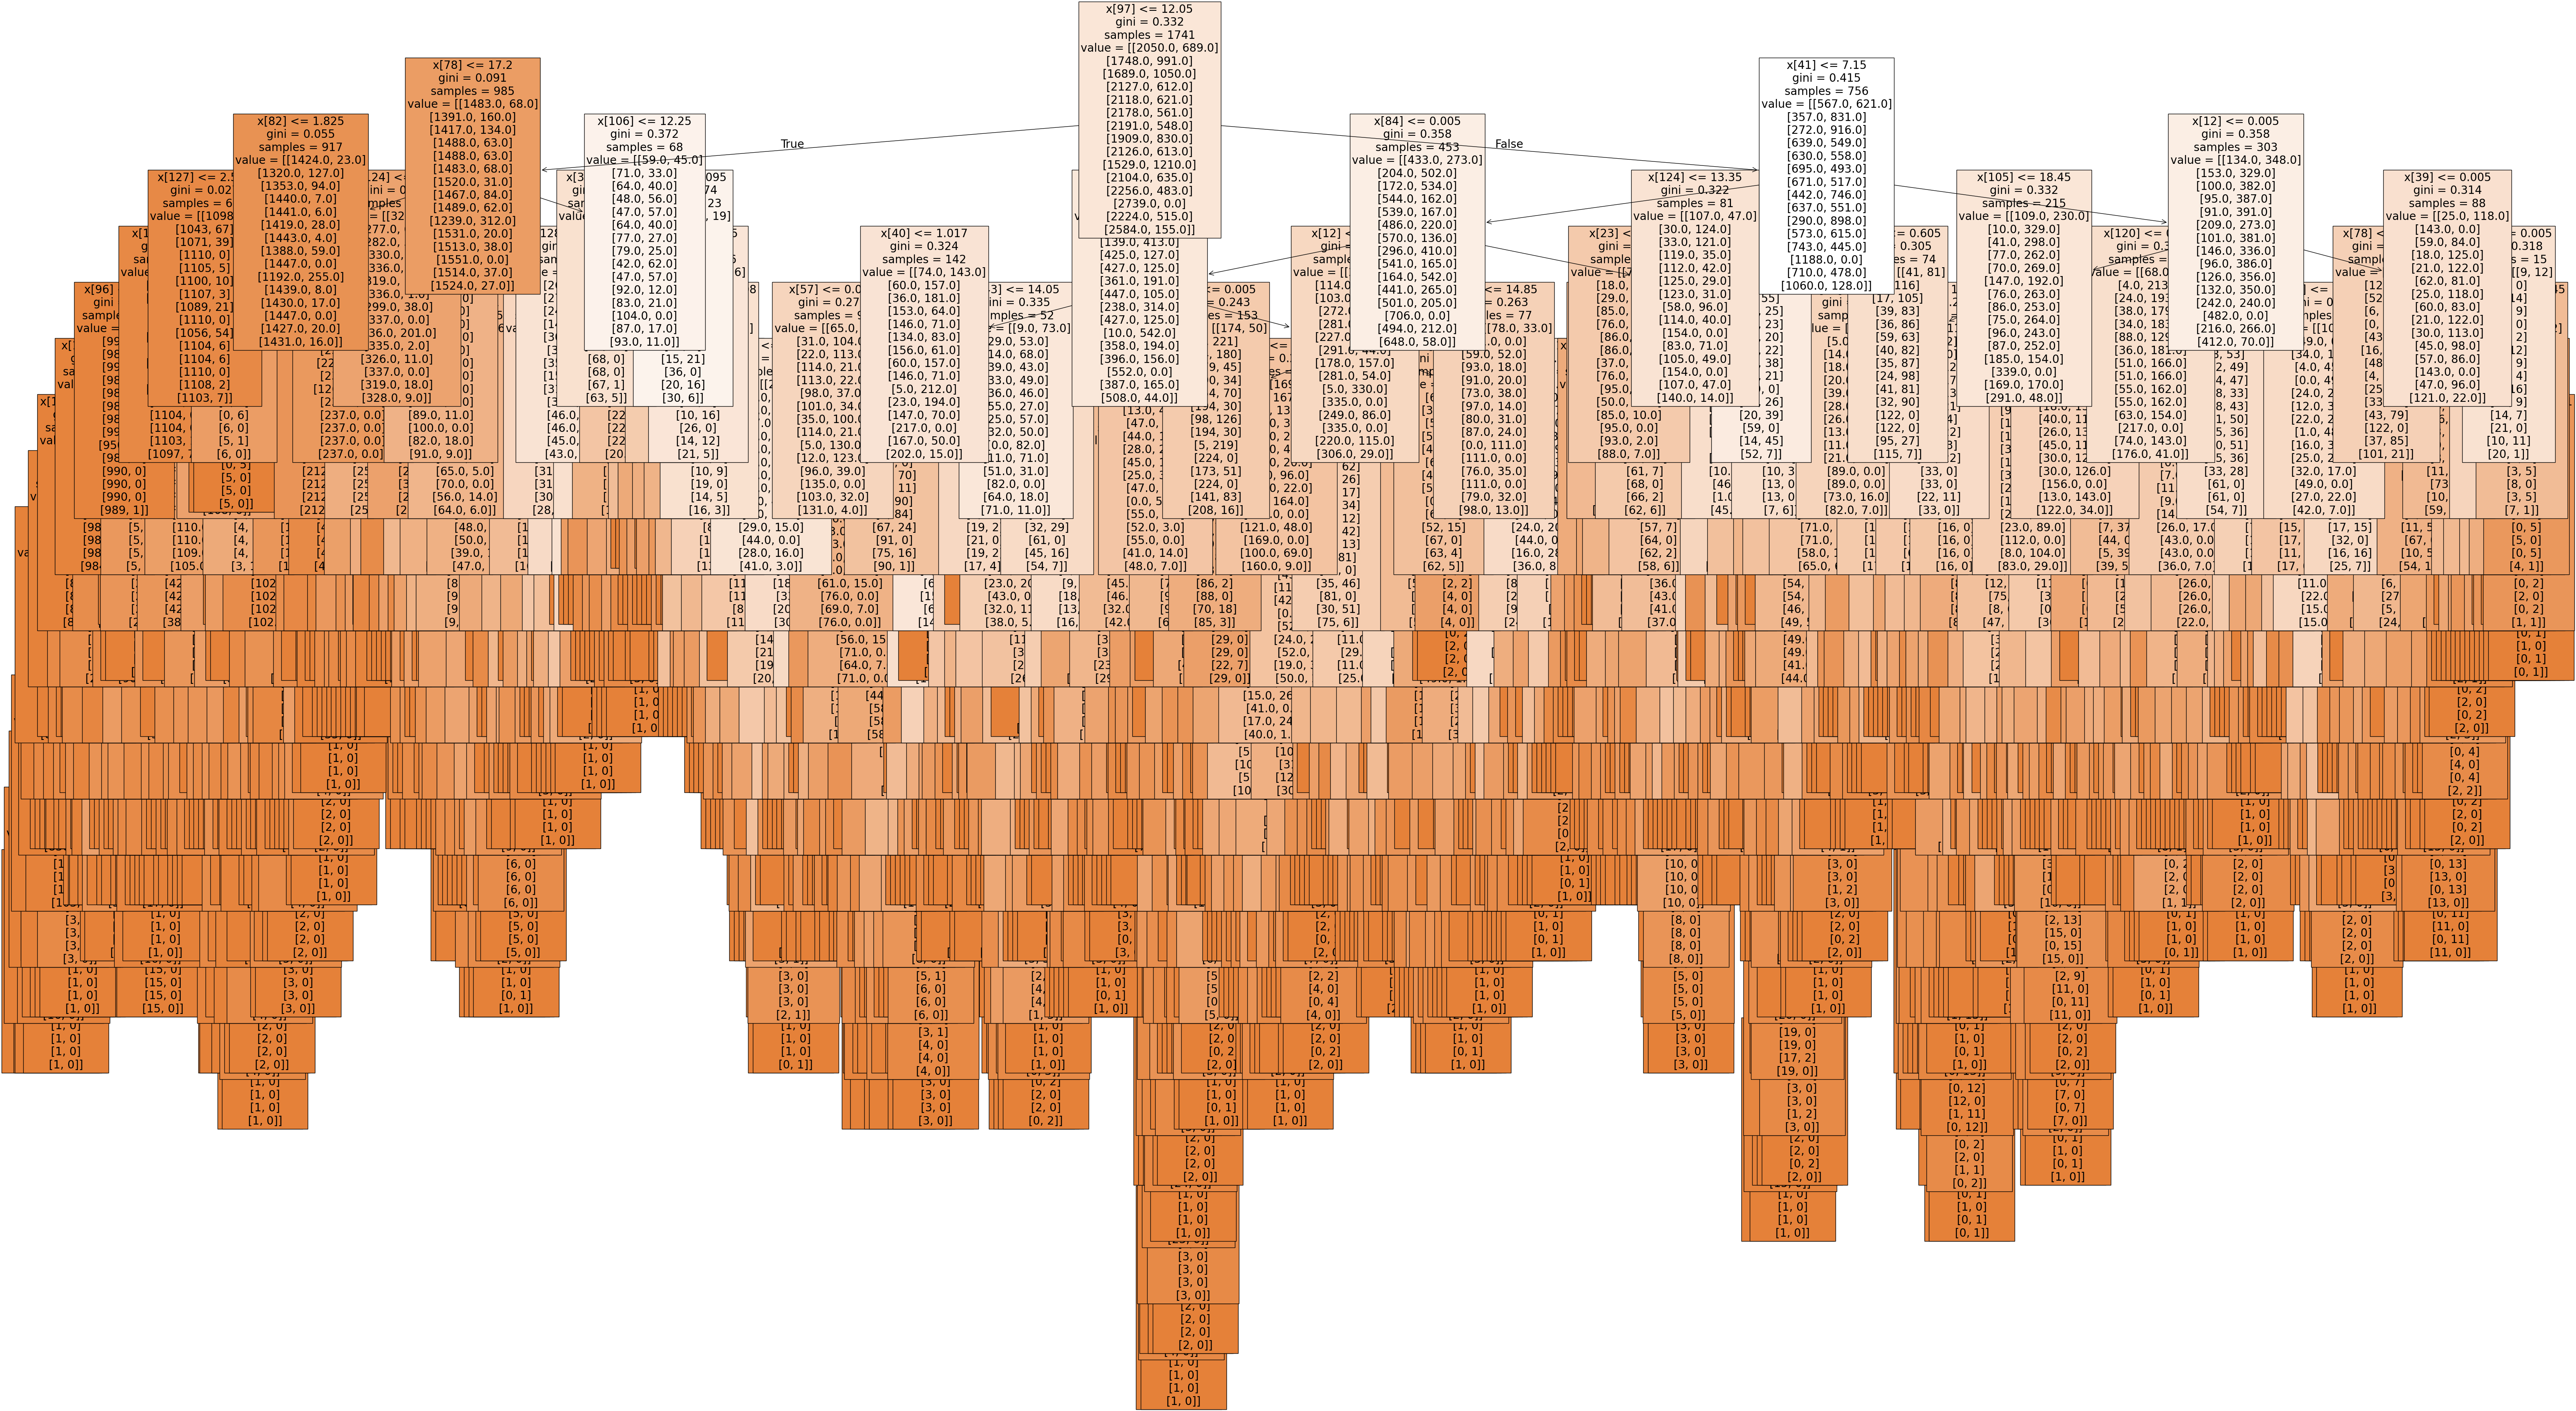

In [50]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [52]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'random_forest_2000s.png'),bbox_inches='tight')

In [53]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([0.00206131, 0.00393503, 0.00279871, 0.01618907, 0.00293311,
       0.00799271, 0.02620604, 0.01342798, 0.00544795, 0.00324727,
       0.00388553, 0.00377631, 0.01478025, 0.00340644, 0.00460454,
       0.00631039, 0.00810109, 0.00264911, 0.0023614 , 0.00497627,
       0.00369563, 0.0117209 , 0.00311941, 0.00460103, 0.01237479,
       0.0160736 , 0.00540572, 0.00490734, 0.00427463, 0.002256  ,
       0.01771095, 0.00442822, 0.00489719, 0.02510903, 0.00907971,
       0.00261256, 0.00736476, 0.00471735, 0.00245526, 0.02085036,
       0.00366603, 0.01214166, 0.02691989, 0.00985091, 0.0026063 ,
       0.00201187, 0.00400656, 0.00314631, 0.00887314, 0.00396995,
       0.00371927, 0.01387463, 0.00739675, 0.00267344, 0.0035333 ,
       0.00315492, 0.00265973, 0.01342867, 0.00395367, 0.0058878 ,
       0.02603517, 0.01727452, 0.00717212, 0.00358787, 0.00418537,
       0.00362148, 0.01499895, 0.00266165, 0.00430513, 0.02805537,
       0.01059332, 0.00278944, 0.00669201, 0.00429256, 0.00261

In [54]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00206131, 0.00393503, 0.00279871, 0.01618907, 0.00293311,
         0.00799271, 0.02620604, 0.01342798, 0.00544795],
        [0.00324727, 0.00388553, 0.00377631, 0.01478025, 0.00340644,
         0.00460454, 0.00631039, 0.00810109, 0.00264911],
        [0.0023614 , 0.00497627, 0.00369563, 0.0117209 , 0.00311941,
         0.00460103, 0.01237479, 0.0160736 , 0.00540572],
        [0.00490734, 0.00427463, 0.002256  , 0.01771095, 0.00442822,
         0.00489719, 0.02510903, 0.00907971, 0.00261256],
        [0.00736476, 0.00471735, 0.00245526, 0.02085036, 0.00366603,
         0.01214166, 0.02691989, 0.00985091, 0.0026063 ],
        [0.00201187, 0.00400656, 0.00314631, 0.00887314, 0.00396995,
         0.00371927, 0.01387463, 0.00739675, 0.00267344],
        [0.0035333 , 0.00315492, 0.00265973, 0.01342867, 0.00395367,
         0.0058878 , 0.02603517, 0.01727452, 0.00717212],
        [0.00358787, 0.00418537, 0.00362148, 0.01499895, 0.00266165,
         0.00430513, 0.02805537, 0.0105933

In [55]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.08099191, 0.05076093, 0.06432874, 0.07527563, 0.09057252,
       0.04967192, 0.08309989, 0.07479857, 0.09638307, 0.06370043,
       0.10812538, 0.05389478, 0.03072364, 0.05083814, 0.02683446])

In [58]:
# Convert the set of unique stations to a list

station = [col.split('_')[0] for col in X_decade.columns if '_' in col]

# Step 2: Get unique station names
stations = set(station)
stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [59]:
important = pd.Series(sumarray, index = stations)
important = important.sort_values(ascending = False)
important

MADRID        0.108125
SONNBLICK     0.096383
MUNCHENB      0.090573
BASEL         0.083100
VALENTIA      0.080992
DEBILT        0.075276
KASSEL        0.074799
HEATHROW      0.064329
DUSSELDORF    0.063700
LJUBLJANA     0.053895
BUDAPEST      0.050838
BELGRADE      0.050761
STOCKHOLM     0.049672
MAASTRICHT    0.030724
OSLO          0.026834
dtype: float64

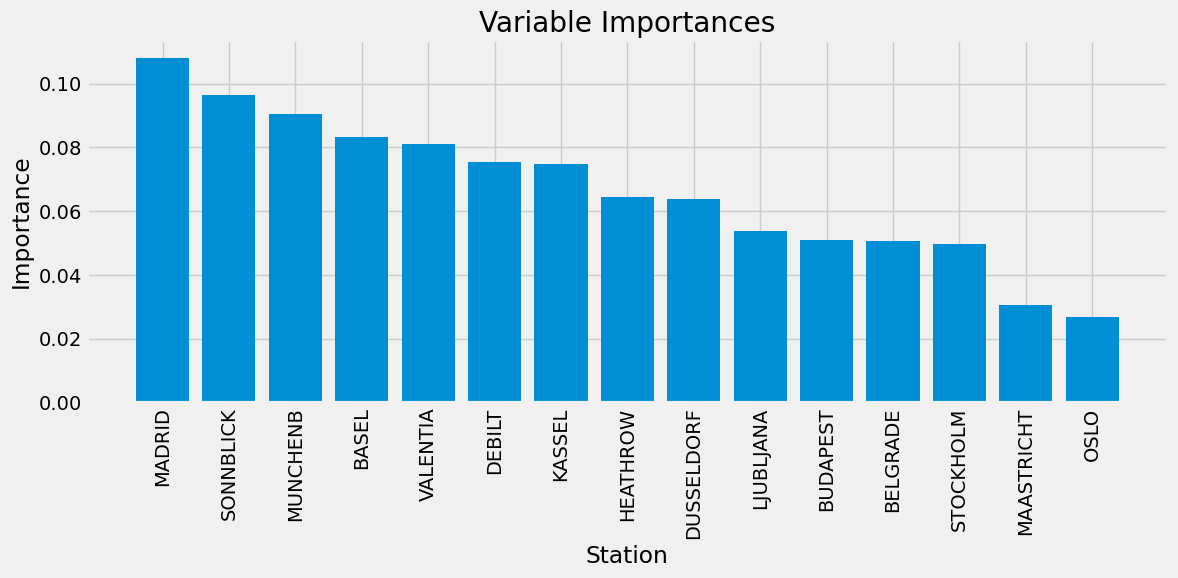

In [72]:
plt.style.use('fivethirtyeight')

values = important.values
stations = important.index.tolist()

x = range(len(values))

plt.figure(figsize=(12,6))
plt.bar(x, values)
plt.xticks(x, stations, rotation='vertical')

plt.xlabel('Station')
plt.ylabel('Importance')
plt.title('Variable Importances')

plt.tight_layout()
plt.savefig(r"C:\Users\kaan\ML_2\04 Analysis\Visualizations\variable_importances.png",dpi=300,bbox_inches='tight')
plt.show()